In [266]:
import pandas as pd
import openpyxl
import numpy as np

In [267]:
df_Rosario= pd.read_excel('./Rosario F.xlsx')

Debera catacterizar el voto utilizando los datos de la muestra y cualquier otra fuente secundaria que considere. Debera subir el codigo utilizado al repositorio y preprar un informe con los descubrimientos mas relevantes.
1. Porcentaje de voto por edad y por genero
2. Datos de georreferenciación
3. Dos regresiones: 1 con edad y 1 con genero.
4. Cruzar voto por radio. 

In [268]:
df_Rosario.shape


(372, 8)

In [269]:
df_Rosario.dtypes


interview__key            object
METODO                    object
Coord1__Latitude         float64
Coord1__Longitude        float64
EDAD                      object
GENERO                    object
INT DE VOTO X ESPACIO     object
RADIO                      int64
dtype: object

In [270]:
df_Rosario.head

<bound method NDFrame.head of     interview__key METODO  Coord1__Latitude  Coord1__Longitude      EDAD  \
0      56-56-25-81    F2F        -32.881458         -60.695274  56 y mas   
1      67-96-98-06    F2F        -32.882259         -60.693571   36 a 45   
2      24-21-01-39    F2F        -32.884731         -60.692882  56 y mas   
3      84-96-80-81    F2F        -32.884673         -60.693464   26 a 35   
4      21-29-79-64    F2F        -32.918833         -60.703628   36 a 45   
..             ...    ...               ...                ...       ...   
367   347615540259    IVR        -32.941000         -60.688295  56 y mas   
368   347615540658    IVR        -32.970114         -60.653051   16 a 25   
369   347615672682    IVR        -32.907759         -60.752721  56 y mas   
370   348715470373    IVR        -32.942161         -60.639935  56 y mas   
371   387154502466    IVR        -32.957100         -60.637709  56 y mas   

        GENERO INT DE VOTO X ESPACIO      RADIO  
0    Ma

In [271]:
df_Rosario['INT DE VOTO X ESPACIO'] = df_Rosario['INT DE VOTO X ESPACIO'].astype(str)


frecuencias = df_Rosario['INT DE VOTO X ESPACIO'].value_counts()


porcentajes = (frecuencias / frecuencias.sum()) * 100


resultados = pd.DataFrame({
    'Categoría': frecuencias.index,
    'Frecuencia': frecuencias.values,
    'Porcentaje': porcentajes.values
})


print(resultados)


        Categoría  Frecuencia  Porcentaje
0             JxC          90   24.193548
1             FdT          80   21.505376
2  NINGUNO/NOSABE          72   19.354839
3     LIBERTARIOS          57   15.322581
4           OTROS          35    9.408602
5             PNK          26    6.989247
6             FIT          12    3.225806


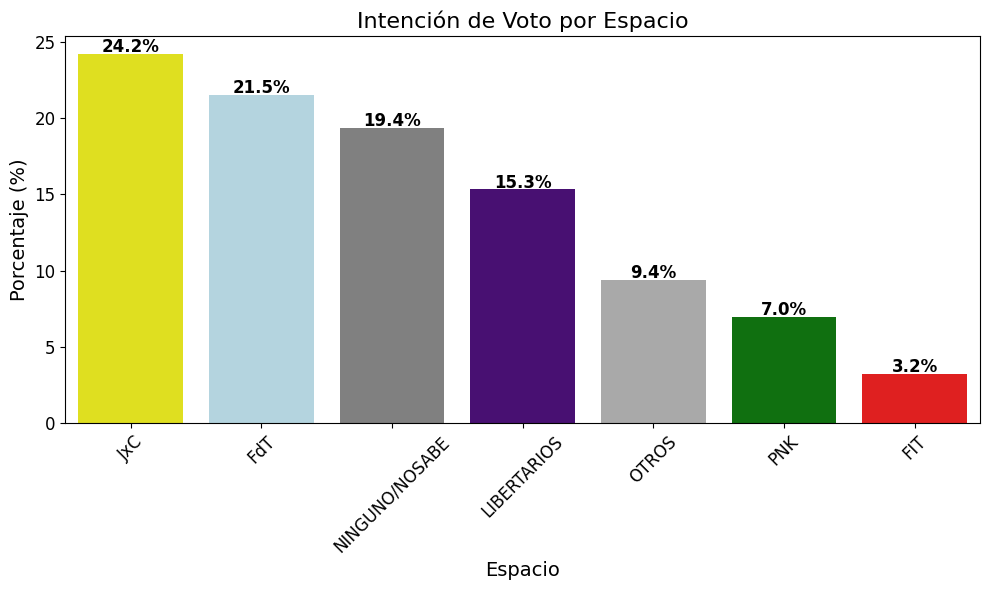

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt


colores = {
    'JxC': 'yellow',
    'FdT': 'lightblue',
    'NINGUNO/NOSABE': 'grey',
    'LIBERTARIOS': '#4B0082',
    'OTROS': 'darkgrey',
    'PNK': 'green',
    'FIT': 'red'
}


resultados['Color'] = resultados['Categoría'].map(colores)


plt.figure(figsize=(10, 6))

ax = sns.barplot(data=resultados, x='Categoría', y='Porcentaje', 
                 hue='Categoría', palette=colores)


for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='center', fontsize=12, color='black', fontweight='bold', 
                xytext=(0, 5), textcoords='offset points')  


plt.title('Intención de Voto por Espacio', fontsize=16)
plt.xlabel('Espacio', fontsize=14)
plt.ylabel('Porcentaje (%)', fontsize=14)


plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout()
plt.show()

In [273]:

tabla_cruzada = pd.crosstab(df_Rosario['INT DE VOTO X ESPACIO'], df_Rosario['EDAD'])


tabla_cruzada_porcentaje_columna = tabla_cruzada.div(tabla_cruzada.sum(axis=0), axis=1) * 100


df_EDAD_VOTO = tabla_cruzada_porcentaje_columna.copy()


print(df_EDAD_VOTO)



EDAD                     16 a 25    26 a 35    36 a 45    46 a 55   56 y mas
INT DE VOTO X ESPACIO                                                       
FIT                     3.571429   8.196721   4.040404   1.204819   0.990099
FdT                    25.000000  21.311475  23.232323  15.662651  23.762376
JxC                    25.000000  14.754098  22.222222  24.096386  31.683168
LIBERTARIOS            25.000000  19.672131  16.161616  12.048193  11.881188
NINGUNO/NOSABE         21.428571  18.032787  16.161616  22.891566  19.801980
OTROS                   0.000000   8.196721   8.080808  20.481928   4.950495
PNK                     0.000000   9.836066  10.101010   3.614458   6.930693


In [274]:
df_EDAD_VOTO.dtypes


EDAD
16 a 25     float64
26 a 35     float64
36 a 45     float64
46 a 55     float64
56 y mas    float64
dtype: object

In [275]:
print(df_EDAD_VOTO.columns)


Index(['16 a 25', '26 a 35', '36 a 45', '46 a 55', '56 y mas'], dtype='object', name='EDAD')


In [276]:
print(df_EDAD_VOTO)

EDAD                     16 a 25    26 a 35    36 a 45    46 a 55   56 y mas
INT DE VOTO X ESPACIO                                                       
FIT                     3.571429   8.196721   4.040404   1.204819   0.990099
FdT                    25.000000  21.311475  23.232323  15.662651  23.762376
JxC                    25.000000  14.754098  22.222222  24.096386  31.683168
LIBERTARIOS            25.000000  19.672131  16.161616  12.048193  11.881188
NINGUNO/NOSABE         21.428571  18.032787  16.161616  22.891566  19.801980
OTROS                   0.000000   8.196721   8.080808  20.481928   4.950495
PNK                     0.000000   9.836066  10.101010   3.614458   6.930693


In [277]:
df_EDAD_VOTO.reset_index(inplace=True)

In [278]:

df_larga = df_EDAD_VOTO.melt(id_vars='INT DE VOTO X ESPACIO', 
                                 var_name='EDAD', 
                                 value_name='Porcentaje')


print(df_larga.head())

  INT DE VOTO X ESPACIO     EDAD  Porcentaje
0                   FIT  16 a 25    3.571429
1                   FdT  16 a 25   25.000000
2                   JxC  16 a 25   25.000000
3           LIBERTARIOS  16 a 25   25.000000
4        NINGUNO/NOSABE  16 a 25   21.428571


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7940\3550010749.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_larga, x='EDAD', y='Porcentaje', hue='INT DE VOTO X ESPACIO',


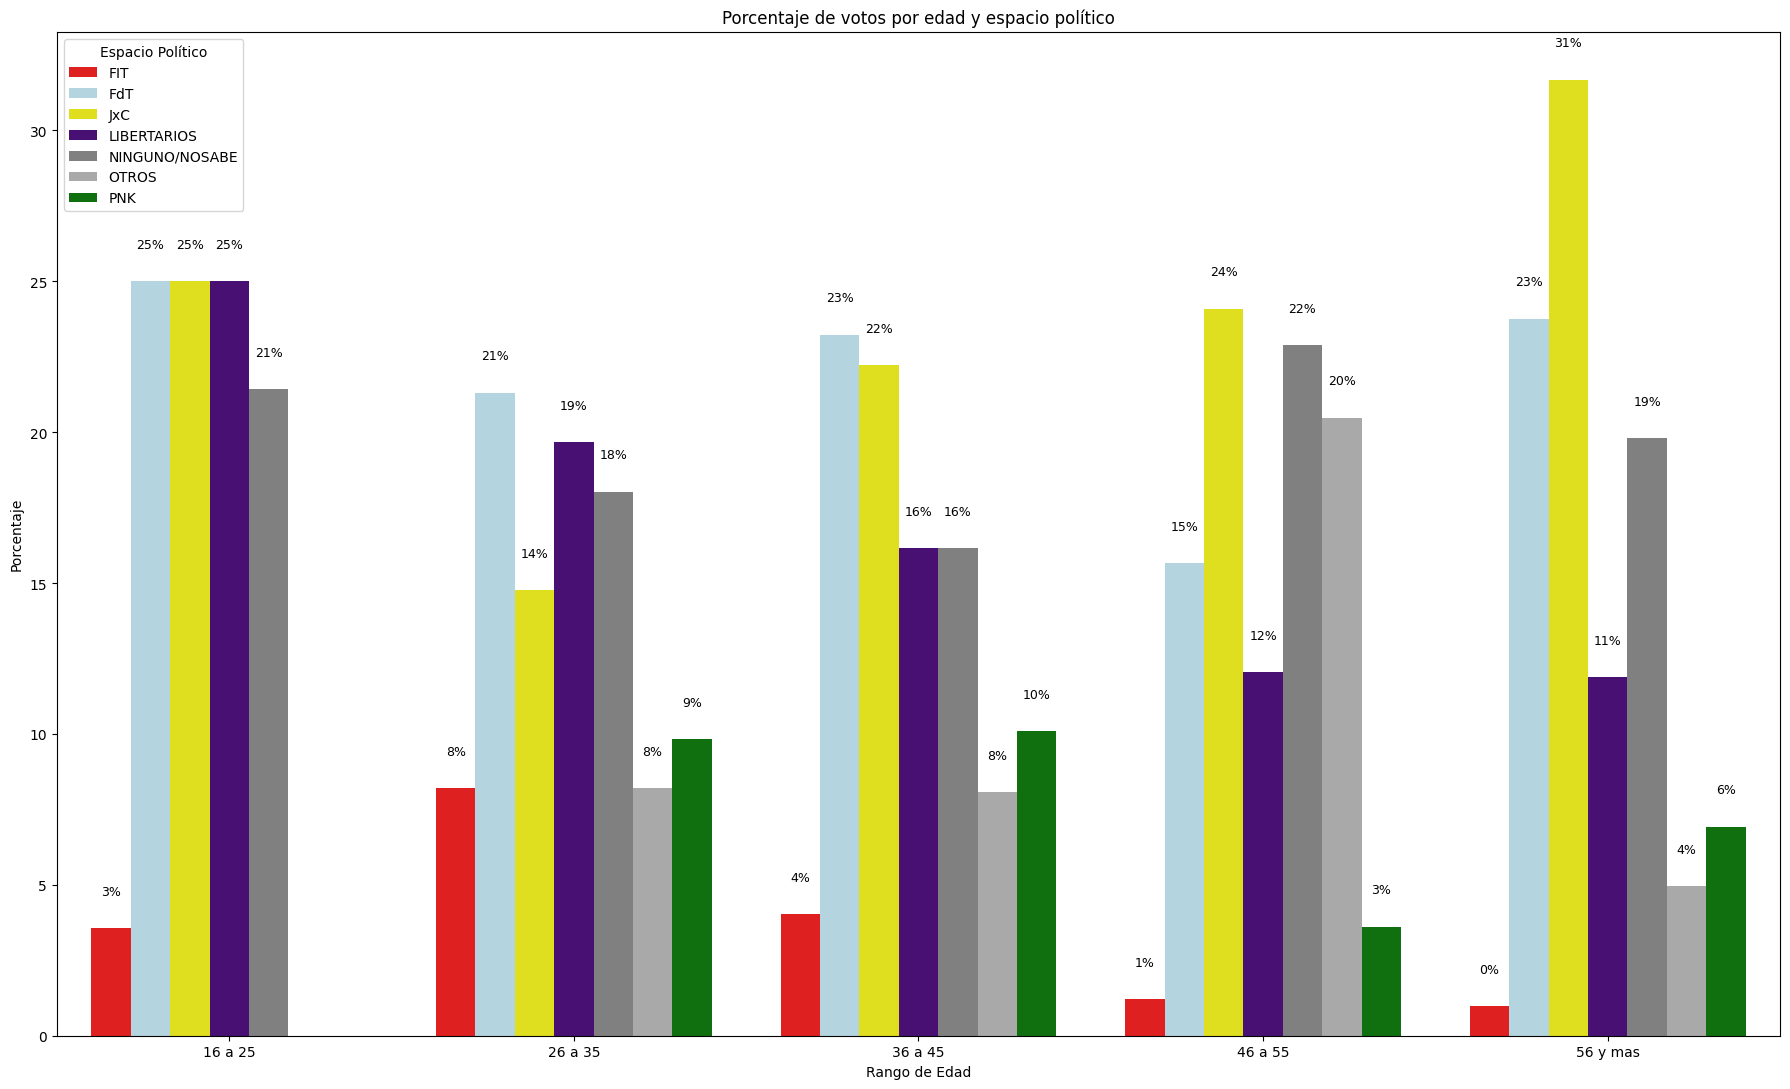

In [279]:

colores = {
    'JxC': 'yellow',
    'FdT': 'lightblue',
    'NINGUNO/NOSABE': 'grey',
    'LIBERTARIOS': '#4B0082',
    'OTROS': 'darkgrey',
    'PNK': 'green',
    'FIT': 'red'
}


plt.figure(figsize=(18, 11))


sns.barplot(data=df_larga, x='EDAD', y='Porcentaje', hue='INT DE VOTO X ESPACIO', 
            palette=colores, ci=None)


for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  
        plt.text(p.get_x() + p.get_width() / 2., height + 1, f'{int(height)}%', 
                 ha='center', va='bottom', fontsize=9)



plt.title('Porcentaje de votos por edad y espacio político')
plt.xlabel('Rango de Edad')
plt.ylabel('Porcentaje')
plt.legend(title='Espacio Político', loc='upper left')


plt.tight_layout()
plt.show()

In [280]:

tabla_cruzada = pd.crosstab(df_Rosario['INT DE VOTO X ESPACIO'], df_Rosario['GENERO'])


tabla_cruzada_porcentaje_columna = tabla_cruzada.div(tabla_cruzada.sum(axis=0), axis=1) * 100


df_porcentajes2 = tabla_cruzada_porcentaje_columna.copy()


print(df_porcentajes2)



GENERO                  Femenino  Masculino       Otro
INT DE VOTO X ESPACIO                                 
FIT                     3.030303   2.525253  22.222222
FdT                    21.212121  22.727273   0.000000
JxC                    25.454545  24.242424   0.000000
LIBERTARIOS             6.666667  22.222222  22.222222
NINGUNO/NOSABE         24.242424  14.141414  44.444444
OTROS                  11.515152   7.575758  11.111111
PNK                     7.878788   6.565657   0.000000


In [281]:
df_porcentajes2.reset_index(inplace=True)


df_larga2 = df_porcentajes2.melt(id_vars='INT DE VOTO X ESPACIO', 
                                 var_name='GENERO', 
                                 value_name='Porcentaje')


print(df_larga2.head())


  INT DE VOTO X ESPACIO    GENERO  Porcentaje
0                   FIT  Femenino    3.030303
1                   FdT  Femenino   21.212121
2                   JxC  Femenino   25.454545
3           LIBERTARIOS  Femenino    6.666667
4        NINGUNO/NOSABE  Femenino   24.242424


In [282]:
print(df_porcentajes2.columns)


Index(['INT DE VOTO X ESPACIO', 'Femenino', 'Masculino', 'Otro'], dtype='object', name='GENERO')


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7940\4032621733.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_larga2, x='GENERO', y='Porcentaje', hue='INT DE VOTO X ESPACIO',


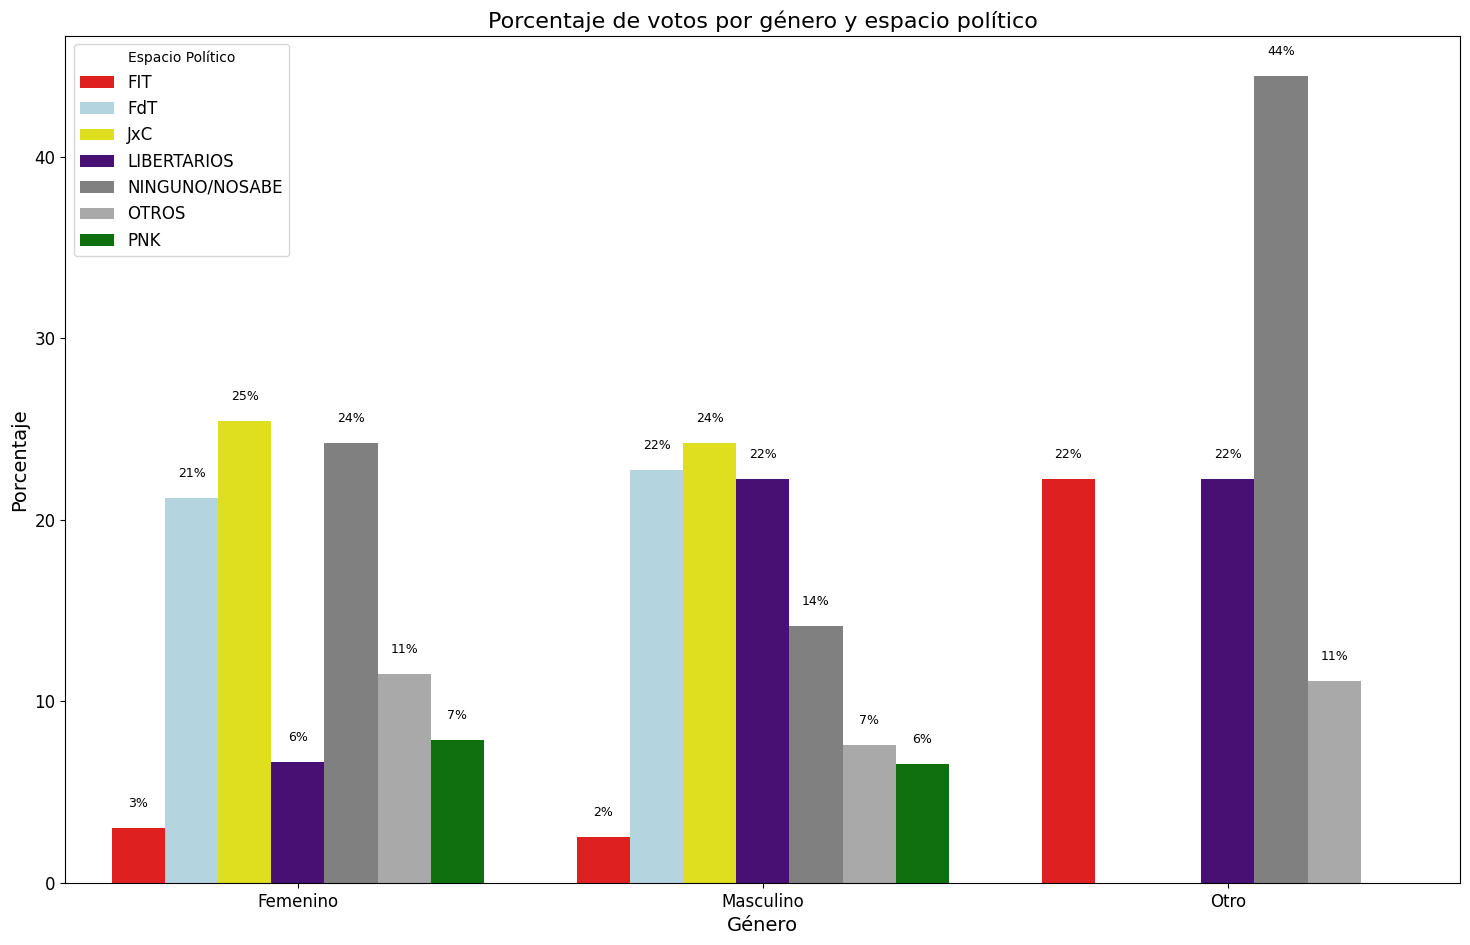

In [283]:
df_larga2 = df_larga2[['GENERO', 'INT DE VOTO X ESPACIO', 'Porcentaje']]


df_larga2.reset_index(drop=True, inplace=True)


plt.figure(figsize=(18, 11))


sns.barplot(data=df_larga2, x='GENERO', y='Porcentaje', hue='INT DE VOTO X ESPACIO', 
            palette=colores, ci=None)


for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:  
        plt.text(p.get_x() + p.get_width() / 2., height + 1, f'{int(height)}%', 
                 ha='center', va='bottom', fontsize=9)


plt.title('Porcentaje de votos por género y espacio político', fontsize=16)
plt.xlabel('Género', fontsize=14)
plt.ylabel('Porcentaje', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Espacio Político', loc='upper left', fontsize=12)


In [284]:
valores_INTNVOTO = df_Rosario ['INT DE VOTO X ESPACIO'].unique() 
valores_EDAD = df_Rosario ['EDAD'].unique()

print("Valores únicos en INTENCIÓN DE VOTO:", valores_INTNVOTO) 
print("Valores únicos en EDAD:", valores_EDAD)

Valores únicos en INTENCIÓN DE VOTO: ['LIBERTARIOS' 'OTROS' 'NINGUNO/NOSABE' 'JxC' 'FdT' 'PNK' 'FIT']
Valores únicos en EDAD: ['56 y mas' '36 a 45' '26 a 35' '46 a 55' '16 a 25']


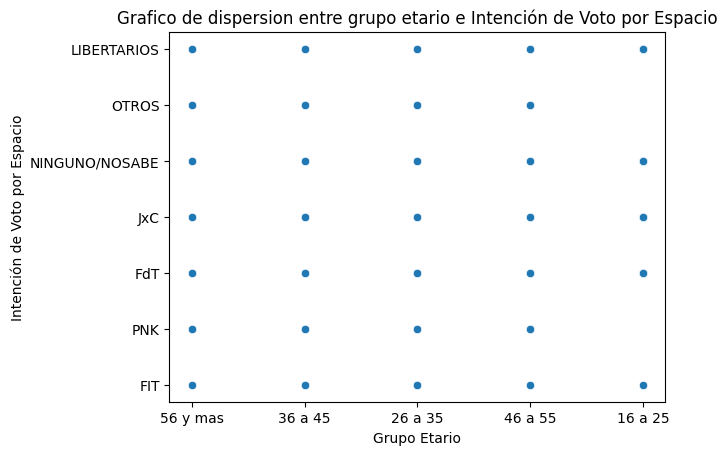

In [285]:
sns.scatterplot(x='EDAD', y='INT DE VOTO X ESPACIO', data=df_Rosario)

plt.title('Grafico de dispersion entre grupo etario e Intención de Voto por Espacio')
plt.xlabel('Grupo Etario')
plt.ylabel('Intención de Voto por Espacio')
plt.show()

In [286]:
edad_ordinal_map = {
    '16 a 25': 1,
    '26 a 35': 2,
    '36 a 45': 3,
    '46 a 55': 4,
    '56 y mas': 5
}
df_Rosario['EDAD_ORDINAL'] = df_Rosario['EDAD'].map(edad_ordinal_map)

df_Rosario_dummies = pd.get_dummies(
    df_Rosario, 
    columns=['GENERO', 'INT DE VOTO X ESPACIO'], 
    drop_first=False  # Incluir todas las categorías
)

columnas_a_eliminar = ['RADIO', 'Coord1__Latitude', 'Coord1__Longitude', 'METODO', 'interview__key', 'EDAD']
df_Rosario_final = df_Rosario_dummies.drop(columns=columnas_a_eliminar, axis=1)

df_Rosario_final = df_Rosario_final.astype(int)

print(df_Rosario_final.head())

   EDAD_ORDINAL  GENERO_Femenino  GENERO_Masculino  GENERO_Otro  \
0             5                0                 1            0   
1             3                0                 1            0   
2             5                1                 0            0   
3             2                0                 1            0   
4             3                1                 0            0   

   INT DE VOTO X ESPACIO_FIT  INT DE VOTO X ESPACIO_FdT  \
0                          0                          0   
1                          0                          0   
2                          0                          0   
3                          0                          0   
4                          0                          0   

   INT DE VOTO X ESPACIO_JxC  INT DE VOTO X ESPACIO_LIBERTARIOS  \
0                          0                                  1   
1                          0                                  0   
2                          0             

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

X = df_Rosario_final['EDAD_ORDINAL']  
y = df_Rosario_final['INT DE VOTO X ESPACIO_FIT'] 

modelo = sm.Logit(y, X)

resultado = modelo.fit()

print(resultado.summary())

odds_ratios = np.exp(resultado.params)
print("Odds Ratios:", odds_ratios)

Optimization terminated successfully.
         Current function value: 0.146708
         Iterations 8
                               Logit Regression Results                              
Dep. Variable:     INT DE VOTO X ESPACIO_FIT   No. Observations:                  372
Model:                                 Logit   Df Residuals:                      371
Method:                                  MLE   Df Model:                            0
Date:                       Sun, 24 Nov 2024   Pseudo R-squ.:                -0.02949
Time:                               20:09:38   Log-Likelihood:                -54.576
converged:                              True   LL-Null:                       -53.012
Covariance Type:                   nonrobust   LLR p-value:                       nan
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
EDAD_ORDINAL    -1.1486      0.117     -9.830   

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

X = df_Rosario_final['EDAD_ORDINAL']  
y = df_Rosario_final['INT DE VOTO X ESPACIO_FdT'] 

modelo = sm.Logit(y, X)

resultado = modelo.fit()

print(resultado.summary())

odds_ratios = np.exp(resultado.params)
print("Odds Ratios:", odds_ratios)

Optimization terminated successfully.
         Current function value: 0.536556
         Iterations 5
                               Logit Regression Results                              
Dep. Variable:     INT DE VOTO X ESPACIO_FdT   No. Observations:                  372
Model:                                 Logit   Df Residuals:                      371
Method:                                  MLE   Df Model:                            0
Date:                       Sun, 24 Nov 2024   Pseudo R-squ.:                -0.03070
Time:                               20:09:38   Log-Likelihood:                -199.60
converged:                              True   LL-Null:                       -193.65
Covariance Type:                   nonrobust   LLR p-value:                       nan
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
EDAD_ORDINAL    -0.3441      0.036     -9.564   

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

X = df_Rosario_final['EDAD_ORDINAL']  
y = df_Rosario_final['INT DE VOTO X ESPACIO_JxC'] 

modelo = sm.Logit(y, X)

resultado = modelo.fit()

print(resultado.summary())

odds_ratios = np.exp(resultado.params)
print("Odds Ratios:", odds_ratios)

Optimization terminated successfully.
         Current function value: 0.583939
         Iterations 5
                               Logit Regression Results                              
Dep. Variable:     INT DE VOTO X ESPACIO_JxC   No. Observations:                  372
Model:                                 Logit   Df Residuals:                      371
Method:                                  MLE   Df Model:                            0
Date:                       Sun, 24 Nov 2024   Pseudo R-squ.:                -0.05537
Time:                               20:09:38   Log-Likelihood:                -217.23
converged:                              True   LL-Null:                       -205.83
Covariance Type:                   nonrobust   LLR p-value:                       nan
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
EDAD_ORDINAL    -0.2762      0.033     -8.310   

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

X = df_Rosario_final['EDAD_ORDINAL']  
y = df_Rosario_final['INT DE VOTO X ESPACIO_LIBERTARIOS'] 

modelo = sm.Logit(y, X)

resultado = modelo.fit()

print(resultado.summary())

odds_ratios = np.exp(resultado.params)
print("Odds Ratios:", odds_ratios)

Optimization terminated successfully.
         Current function value: 0.430950
         Iterations 6
                                   Logit Regression Results                                  
Dep. Variable:     INT DE VOTO X ESPACIO_LIBERTARIOS   No. Observations:                  372
Model:                                         Logit   Df Residuals:                      371
Method:                                          MLE   Df Model:                            0
Date:                               Sun, 24 Nov 2024   Pseudo R-squ.:               -0.006272
Time:                                       20:09:38   Log-Likelihood:                -160.31
converged:                                      True   LL-Null:                       -159.31
Covariance Type:                           nonrobust   LLR p-value:                       nan
                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

X = df_Rosario_final['EDAD_ORDINAL']  
y = df_Rosario_final['INT DE VOTO X ESPACIO_NINGUNO/NOSABE'] 

modelo = sm.Logit(y, X)

resultado = modelo.fit()

print(resultado.summary())

odds_ratios = np.exp(resultado.params)
print("Odds Ratios:", odds_ratios)

Optimization terminated successfully.
         Current function value: 0.515342
         Iterations 5
                                    Logit Regression Results                                    
Dep. Variable:     INT DE VOTO X ESPACIO_NINGUNO/NOSABE   No. Observations:                  372
Model:                                            Logit   Df Residuals:                      371
Method:                                             MLE   Df Model:                            0
Date:                                  Sun, 24 Nov 2024   Pseudo R-squ.:                -0.04888
Time:                                          20:09:38   Log-Likelihood:                -191.71
converged:                                         True   LL-Null:                       -182.77
Covariance Type:                              nonrobust   LLR p-value:                       nan
                   coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------

In [ ]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

X = df_Rosario_final['EDAD_ORDINAL']  
y = df_Rosario_final['INT DE VOTO X ESPACIO_OTROS'] 

modelo = sm.Logit(y, X)

resultado = modelo.fit()

print(resultado.summary())

odds_ratios = np.exp(resultado.params)
print("Odds Ratios:", odds_ratios)

Optimization terminated successfully.
         Current function value: 0.354133
         Iterations 6
                                Logit Regression Results                               
Dep. Variable:     INT DE VOTO X ESPACIO_OTROS   No. Observations:                  372
Model:                                   Logit   Df Residuals:                      371
Method:                                    MLE   Df Model:                            0
Date:                         Sun, 24 Nov 2024   Pseudo R-squ.:                 -0.1354
Time:                                 20:09:38   Log-Likelihood:                -131.74
converged:                                True   LL-Null:                       -116.02
Covariance Type:                     nonrobust   LLR p-value:                       nan
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
EDAD_ORDINAL    -0.6133      0.0

REGRESION LOGISTICA INT DE VOTO Y GENERO

In [297]:
import statsmodels.api as sm
import pandas as pd
# GRÁFICO
import matplotlib.pyplot as plt
import seaborn as sns
df_Rosario_final.head()
print(df_Rosario_final.dtypes)

EDAD_ORDINAL                              int64
GENERO_Femenino                           int64
GENERO_Masculino                          int64
GENERO_Otro                               int64
INT DE VOTO X ESPACIO_FIT                 int64
INT DE VOTO X ESPACIO_FdT                 int64
INT DE VOTO X ESPACIO_JxC                 int64
INT DE VOTO X ESPACIO_LIBERTARIOS         int64
INT DE VOTO X ESPACIO_NINGUNO/NOSABE      int64
INT DE VOTO X ESPACIO_OTROS               int64
INT DE VOTO X ESPACIO_PNK                 int64
Probabilidades                          float64
dtype: object


In [300]:
#REGRESIÓN PARA EL FRENTE DE TODOS 

# Selección de la variable dependiente (INT DE VOTO X ESPACIO_FdT)
y = df_Rosario_final['INT DE VOTO X ESPACIO_FdT']

# Selección de las variables independientes (variables de género)
X = df_Rosario_final[['GENERO_Masculino', 'GENERO_Otro']]

# Agregamos una constante a las variables independientes
X = sm.add_constant(X)

# Ajuste del modelo de regresión logística
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Resumen de los resultados
print(result.summary())

# Obtener las predicciones
df_Rosario_final['Probabilidades'] = result.predict(X)

         Current function value: 0.514474
         Iterations: 35
                               Logit Regression Results                              
Dep. Variable:     INT DE VOTO X ESPACIO_FdT   No. Observations:                  372
Model:                                 Logit   Df Residuals:                      369
Method:                                  MLE   Df Model:                            2
Date:                       Sun, 24 Nov 2024   Pseudo R-squ.:                 0.01172
Time:                               20:32:47   Log-Likelihood:                -191.38
converged:                             False   LL-Null:                       -193.65
Covariance Type:                   nonrobust   LLR p-value:                    0.1033
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.3122      0.190     -6.891      0.000      -1.685    

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7940\2031329841.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')


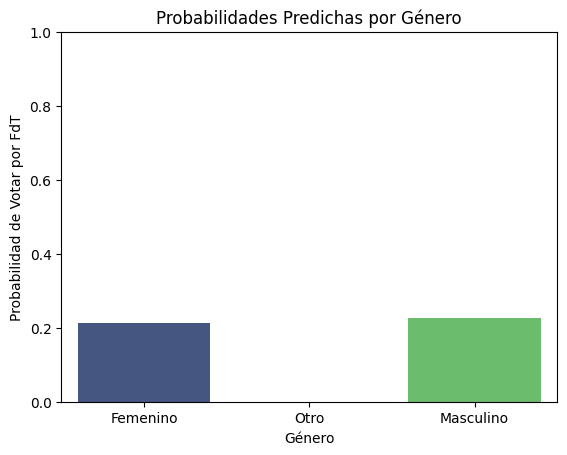

In [299]:
# GRÁFICO

# Crear un DataFrame auxiliar para el gráfico
grafico = df_Rosario_final.groupby(['GENERO_Masculino', 'GENERO_Otro'])['Probabilidades'].mean().reset_index()

# Renombrar columnas para mayor claridad
grafico['GENERO'] = grafico.apply(
    lambda row: 'Femenino' if row['GENERO_Masculino'] == 0 and row['GENERO_Otro'] == 0
    else 'Masculino' if row['GENERO_Masculino'] == 1 else 'Otro',
    axis=1
)

# Crear el gráfico
sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')
plt.title('Probabilidades Predichas por Género')
plt.ylabel('Probabilidad de Votar por FdT')  # Cambia según la variable dependiente
plt.xlabel('Género')
plt.ylim(0, 1)
plt.show()


In [301]:
#REGRESIÓN PARA JxC

# Selección de la variable dependiente (INT DE VOTO X ESPACIO_JxC)
y = df_Rosario_final['INT DE VOTO X ESPACIO_JxC']

# Selección de las variables independientes (variables de género)
X = df_Rosario_final[['GENERO_Masculino', 'GENERO_Otro']]

# Agregamos una constante a las variables independientes
X = sm.add_constant(X)

# Ajuste del modelo de regresión logística
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Resumen de los resultados
print(result.summary())

# Obtener las predicciones
df_Rosario_final['Probabilidades'] = result.predict(X)

         Current function value: 0.546409
         Iterations: 35
                               Logit Regression Results                              
Dep. Variable:     INT DE VOTO X ESPACIO_JxC   No. Observations:                  372
Model:                                 Logit   Df Residuals:                      369
Method:                                  MLE   Df Model:                            2
Date:                       Sun, 24 Nov 2024   Pseudo R-squ.:                 0.01246
Time:                               20:33:25   Log-Likelihood:                -203.26
converged:                             False   LL-Null:                       -205.83
Covariance Type:                   nonrobust   LLR p-value:                   0.07702
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -1.0745      0.179     -6.012      0.000      -1.425    

c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\Usuario\AppData\Local\Temp\ipykernel_7940\164778435.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')


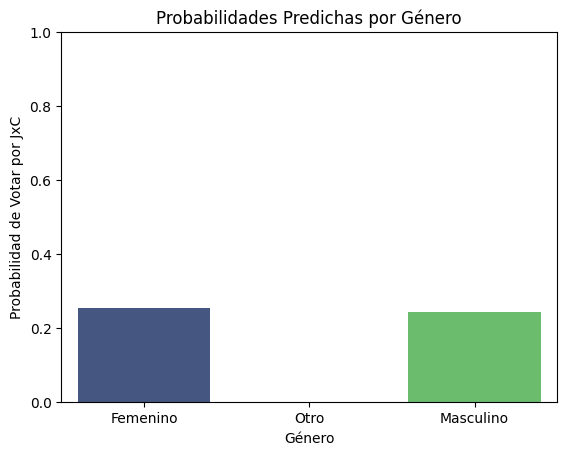

In [302]:
# GRÁFICO

# Crear un DataFrame auxiliar para el gráfico
grafico = df_Rosario_final.groupby(['GENERO_Masculino', 'GENERO_Otro'])['Probabilidades'].mean().reset_index()

# Renombrar columnas para mayor claridad
grafico['GENERO'] = grafico.apply(
    lambda row: 'Femenino' if row['GENERO_Masculino'] == 0 and row['GENERO_Otro'] == 0
    else 'Masculino' if row['GENERO_Masculino'] == 1 else 'Otro',
    axis=1
)

# Crear el gráfico
sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')
plt.title('Probabilidades Predichas por Género')
plt.ylabel('Probabilidad de Votar por JxC')  # Cambia según la variable dependiente
plt.xlabel('Género')
plt.ylim(0, 1)
plt.show()

In [303]:
#REGRESIÓN PARA LIBERTARIOS

# Selección de la variable dependiente (INT DE VOTO X ESPACIO_LIBERTARIOS)
y = df_Rosario_final['INT DE VOTO X ESPACIO_LIBERTARIOS']

# Selección de las variables independientes (variables de género)
X = df_Rosario_final[['GENERO_Masculino', 'GENERO_Otro']]

# Agregamos una constante a las variables independientes
X = sm.add_constant(X)

# Ajuste del modelo de regresión logística
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Resumen de los resultados
print(result.summary())

# Obtener las predicciones
df_Rosario_final['Probabilidades'] = result.predict(X)

Optimization terminated successfully.
         Current function value: 0.403394
         Iterations 7
                                   Logit Regression Results                                  
Dep. Variable:     INT DE VOTO X ESPACIO_LIBERTARIOS   No. Observations:                  372
Model:                                         Logit   Df Residuals:                      369
Method:                                          MLE   Df Model:                            2
Date:                               Sun, 24 Nov 2024   Pseudo R-squ.:                 0.05807
Time:                                       20:38:25   Log-Likelihood:                -150.06
converged:                                      True   LL-Null:                       -159.31
Covariance Type:                           nonrobust   LLR p-value:                 9.596e-05
                       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7940\3609506533.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')


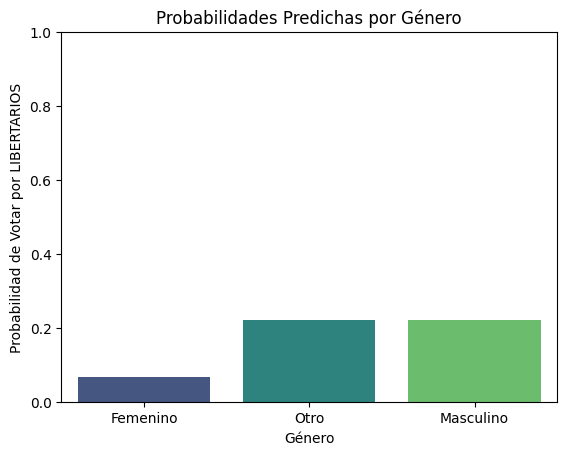

In [304]:
# GRÁFICO

# Crear un DataFrame auxiliar para el gráfico
grafico = df_Rosario_final.groupby(['GENERO_Masculino', 'GENERO_Otro'])['Probabilidades'].mean().reset_index()

# Renombrar columnas para mayor claridad
grafico['GENERO'] = grafico.apply(
    lambda row: 'Femenino' if row['GENERO_Masculino'] == 0 and row['GENERO_Otro'] == 0
    else 'Masculino' if row['GENERO_Masculino'] == 1 else 'Otro',
    axis=1
)

# Crear el gráfico
sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')
plt.title('Probabilidades Predichas por Género')
plt.ylabel('Probabilidad de Votar por LIBERTARIOS')  # Cambia según la variable dependiente
plt.xlabel('Género')
plt.ylim(0, 1)
plt.show()

In [307]:
#REGRESIÓN PARA NINGUNO/NOSABE

# Selección de la variable dependiente (INT DE VOTO X ESPACIO_NINGUNO/NOSABE)
y = df_Rosario_final['INT DE VOTO X ESPACIO_NINGUNO/NOSABE']

# Selección de las variables independientes (variables de género)
X = df_Rosario_final[['GENERO_Masculino', 'GENERO_Otro']]

# Agregamos una constante a las variables independientes
X = sm.add_constant(X)

# Ajuste del modelo de regresión logística
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Resumen de los resultados
print(result.summary())

# Obtener las predicciones
df_Rosario_final['Probabilidades'] = result.predict(X)

Optimization terminated successfully.
         Current function value: 0.479190
         Iterations 6
                                    Logit Regression Results                                    
Dep. Variable:     INT DE VOTO X ESPACIO_NINGUNO/NOSABE   No. Observations:                  372
Model:                                            Logit   Df Residuals:                      369
Method:                                             MLE   Df Model:                            2
Date:                                  Sun, 24 Nov 2024   Pseudo R-squ.:                 0.02470
Time:                                          20:45:44   Log-Likelihood:                -178.26
converged:                                         True   LL-Null:                       -182.77
Covariance Type:                              nonrobust   LLR p-value:                   0.01094
                       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7940\1580028513.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')


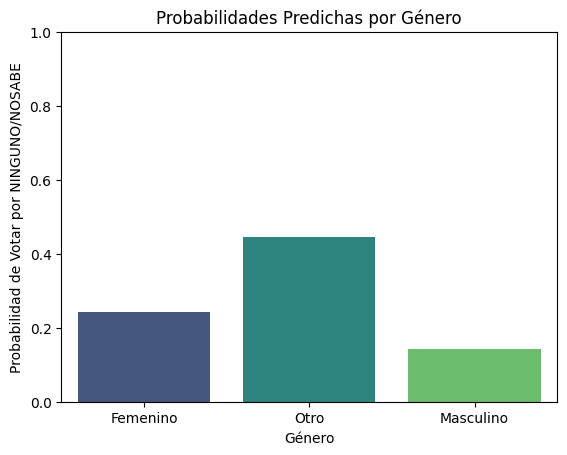

In [308]:
# GRÁFICO

# Crear un DataFrame auxiliar para el gráfico
grafico = df_Rosario_final.groupby(['GENERO_Masculino', 'GENERO_Otro'])['Probabilidades'].mean().reset_index()

# Renombrar columnas para mayor claridad
grafico['GENERO'] = grafico.apply(
    lambda row: 'Femenino' if row['GENERO_Masculino'] == 0 and row['GENERO_Otro'] == 0
    else 'Masculino' if row['GENERO_Masculino'] == 1 else 'Otro',
    axis=1
)

# Crear el gráfico
sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')
plt.title('Probabilidades Predichas por Género')
plt.ylabel('Probabilidad de Votar por NINGUNO/NOSABE')  # Cambia según la variable dependiente
plt.xlabel('Género')
plt.ylim(0, 1)
plt.show()

In [309]:
#REGRESIÓN PARA OTROS

# Selección de la variable dependiente (INT DE VOTO X ESPACIO_OTROS)
y = df_Rosario_final['INT DE VOTO X ESPACIO_OTROS']

# Selección de las variables independientes (variables de género)
X = df_Rosario_final[['GENERO_Masculino', 'GENERO_Otro']]

# Agregamos una constante a las variables independientes
X = sm.add_constant(X)

# Ajuste del modelo de regresión logística
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Resumen de los resultados
print(result.summary())

# Obtener las predicciones
df_Rosario_final['Probabilidades'] = result.predict(X)

Optimization terminated successfully.
         Current function value: 0.309650
         Iterations 6
                                Logit Regression Results                               
Dep. Variable:     INT DE VOTO X ESPACIO_OTROS   No. Observations:                  372
Model:                                   Logit   Df Residuals:                      369
Method:                                    MLE   Df Model:                            2
Date:                         Sun, 24 Nov 2024   Pseudo R-squ.:                0.007185
Time:                                 20:46:36   Log-Likelihood:                -115.19
converged:                                True   LL-Null:                       -116.02
Covariance Type:                     nonrobust   LLR p-value:                    0.4345
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.0

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7940\523634207.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')


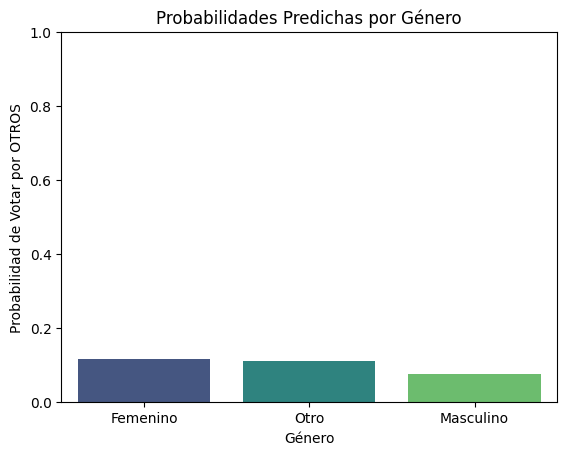

In [310]:
# GRÁFICO

# Crear un DataFrame auxiliar para el gráfico
grafico = df_Rosario_final.groupby(['GENERO_Masculino', 'GENERO_Otro'])['Probabilidades'].mean().reset_index()

# Renombrar columnas para mayor claridad
grafico['GENERO'] = grafico.apply(
    lambda row: 'Femenino' if row['GENERO_Masculino'] == 0 and row['GENERO_Otro'] == 0
    else 'Masculino' if row['GENERO_Masculino'] == 1 else 'Otro',
    axis=1
)

# Crear el gráfico
sns.barplot(data=grafico, x='GENERO', y='Probabilidades', palette='viridis')
plt.title('Probabilidades Predichas por Género')
plt.ylabel('Probabilidad de Votar por OTROS')  # Cambia según la variable dependiente
plt.xlabel('Género')
plt.ylim(0, 1)
plt.show()

In [311]:
#REGRESIÓN PARA FIT

# Selección de la variable dependiente (INT DE VOTO X FIT)
y = df_Rosario_final['INT DE VOTO X FIT']

# Selección de las variables independientes (variables de género)
X = df_Rosario_final[['GENERO_Masculino', 'GENERO_Otro']]

# Agregamos una constante a las variables independientes
X = sm.add_constant(X)

# Ajuste del modelo de regresión logística
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Resumen de los resultados
print(result.summary())

# Obtener las predicciones
df_Rosario_final['Probabilidades'] = result.predict(X)

KeyError: 'INT DE VOTO X FIT'